In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import opendatasets as od
import pylab as pl
%matplotlib inline

In [2]:
od.download("https://www.kaggle.com/datasets/rinichristy/2022-fuel-consumption-ratings")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  sumitk87549


Your Kaggle Key:

  ········


100%|██████████| 13.4k/13.4k [00:00<00:00, 5.34MB/s]

In [3]:
df_raw = pd.read_csv("2022-fuel-consumption-ratings/MY2022 Fuel Consumption Ratings.csv",encoding="ISO-8859-1")
df_raw.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         946 non-null    int64  
 1   Make                               946 non-null    object 
 2   Model                              946 non-null    object 
 3   Vehicle Class                      946 non-null    object 
 4   Engine Size(L)                     946 non-null    float64
 5   Cylinders                          946 non-null    int64  
 6   Transmission                       946 non-null    object 
 7   Fuel Type                          946 non-null    object 
 8   Fuel Consumption (City (L/100 km)  946 non-null    float64
 9   Fuel Consumption(Hwy (L/100 km))   946 non-null    float64
 10  Fuel Consumption(Comb (L/100 km))  946 non-null    float64
 11  Fuel Consumption(Comb (mpg))       946 non-null    int64  

In [5]:
df_raw.describe()

,Model Year,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
count,946.0,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,2022.0,3.198732,5.668076,12.506448,9.363319,11.092072,27.247357,259.172304,4.539112,4.950317
std,0.0,1.374814,1.932670,3.452043,2.285125,2.876276,7.685217,64.443149,1.471799,1.679842
min,2022.0,1.200000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000,1.000000,1.000000
25%,2022.0,2.000000,4.000000,10.200000,7.700000,9.100000,22.000000,213.250000,3.000000,3.000000
50%,2022.0,3.000000,6.000000,12.200000,9.200000,10.800000,26.000000,257.000000,5.000000,5.000000
75%,2022.0,3.800000,6.000000,14.700000,10.700000,12.900000,31.000000,300.750000,5.000000,6.000000
max,2022.0,8.000000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000,10.000000,7.000000


In [7]:
gaadi = df_raw[['Engine Size(L)','Cylinders','Fuel Consumption(Comb (L/100 km))','CO2 Emissions(g/km)','CO2 Rating','Smog Rating']]
gaadi.head(8)

,Engine Size(L),Cylinders,Fuel Consumption(Comb (L/100 km)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2.4,4,8.6,200,6,3
1,3.5,6,11.2,263,4,5
2,2.0,4,9.9,232,5,6
3,2.0,4,10.3,242,5,6
4,2.0,4,9.8,230,5,7
5,2.0,4,9.8,231,5,7
6,3.0,6,11.0,256,5,5
7,3.0,6,11.2,261,4,5


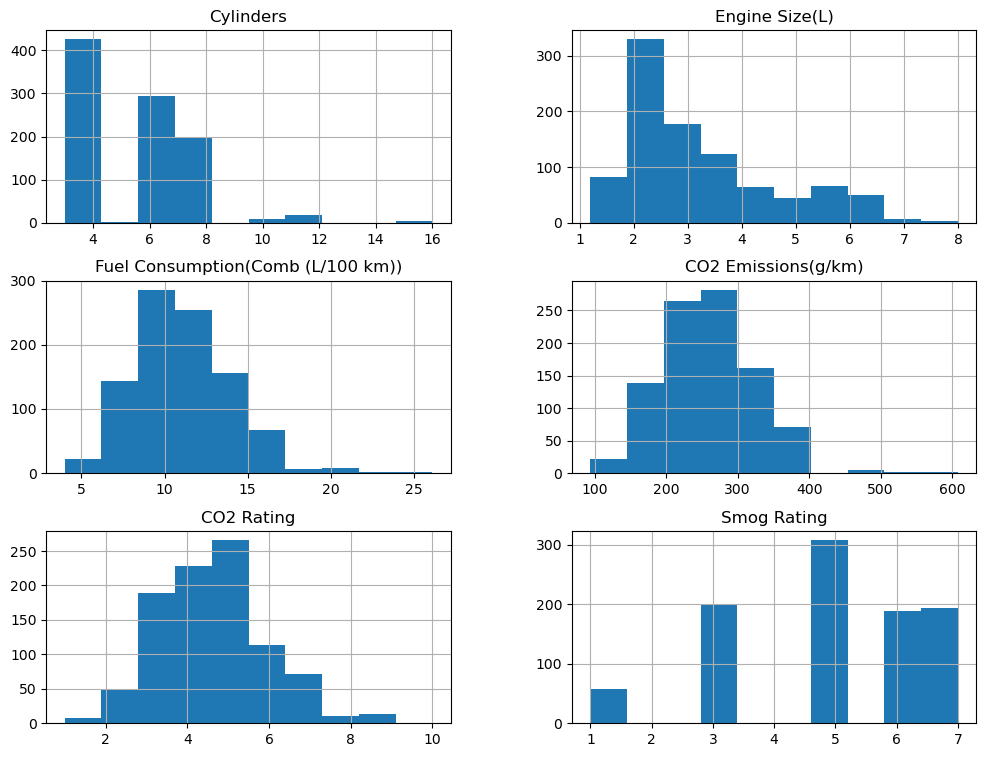

In [12]:
viz = gaadi[['Cylinders','Engine Size(L)','Fuel Consumption(Comb (L/100 km))','CO2 Emissions(g/km)','CO2 Rating','Smog Rating']]
viz.hist(figsize=(12,9))
plt.show()

In [14]:
gaadi.rename(columns={"Engine Size(L)":"EngineSize","Fuel Consumption(Comb (L/100 km))":"FuelConsumption","CO2 Emissions(g/km)":"CO2Emissions","CO2 Rating":"CO2Rating","Smog Rating":"SmogRating"},inplace=True)
gaadi.head()

C:\Users\Sumit\AppData\Local\Temp\ipykernel_14760\416578200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gaadi.rename(columns={"Engine Size(L)":"EngineSize","Fuel Consumption(Comb (L/100 km))":"FuelConsumption","CO2 Emissions(g/km)":"CO2Emissions","CO2 Rating":"CO2Rating","Smog Rating":"SmogRating"},inplace=True)


,EngineSize,Cylinders,FuelConsumption,CO2Emissions,CO2Rating,SmogRating
0,2.4,4,8.6,200,6,3
1,3.5,6,11.2,263,4,5
2,2.0,4,9.9,232,5,6
3,2.0,4,10.3,242,5,6
4,2.0,4,9.8,230,5,7


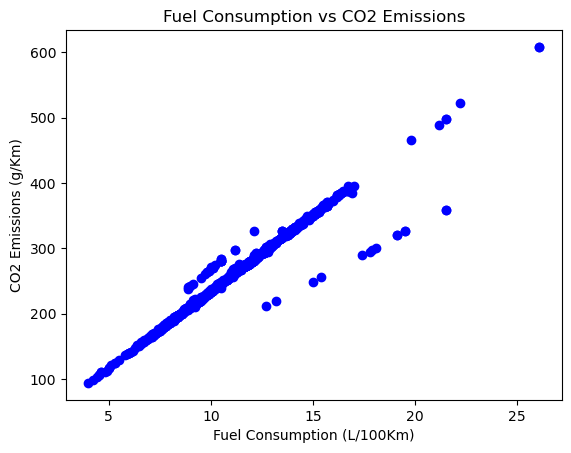

In [18]:
plt.scatter(gaadi.FuelConsumption, gaadi.CO2Emissions, color='blue')
plt.xlabel('Fuel Consumption (L/100Km)')
plt.ylabel('CO2 Emissions (g/Km)')
plt.title('Fuel Consumption vs CO2 Emissions')
plt.show()

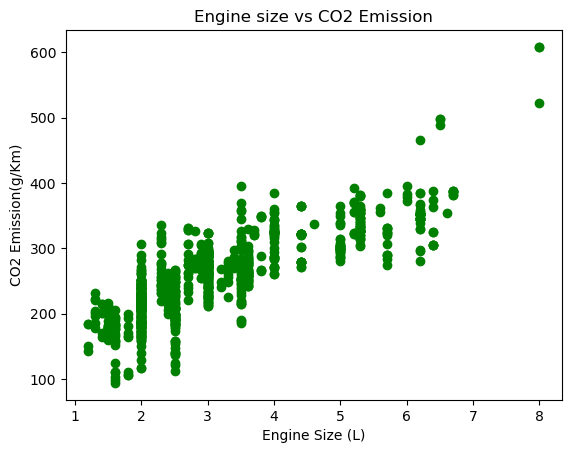

In [19]:
plt.scatter(gaadi.EngineSize, gaadi.CO2Emissions, color='green')
plt.xlabel('Engine Size (L)')
plt.ylabel('CO2 Emission(g/Km)')
plt.title('Engine size vs CO2 Emission')
plt.show()

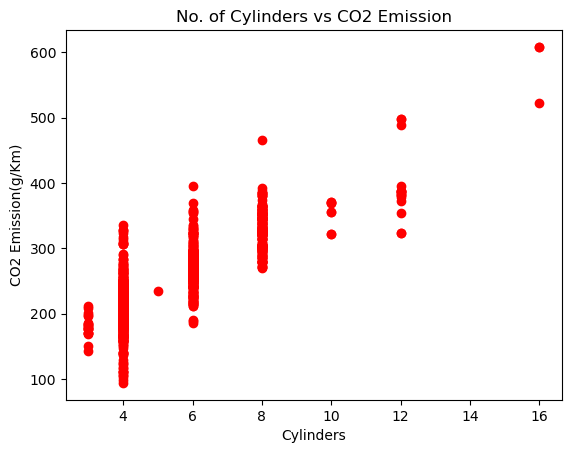

In [34]:
plt.scatter(gaadi.Cylinders, gaadi.CO2Emissions, color='red')
plt.xlabel('Cylinders')
plt.ylabel('CO2 Emission(g/Km)')
plt.title('No. of Cylinders vs CO2 Emission')
plt.show()

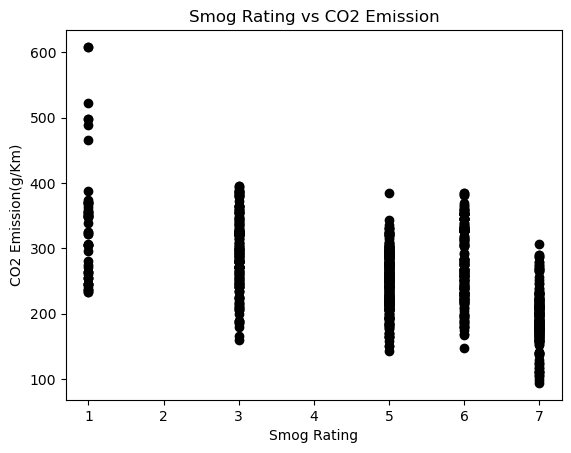

In [24]:
plt.scatter(gaadi.SmogRating, gaadi.CO2Emissions, color='black')
plt.xlabel('Smog Rating')
plt.ylabel('CO2 Emission(g/Km)')
plt.title('Smog Rating vs CO2 Emission')
plt.show()

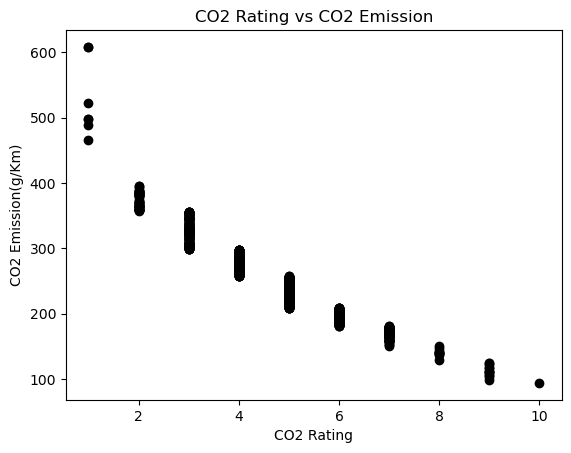

In [25]:
plt.scatter(gaadi.CO2Rating, gaadi.CO2Emissions, color='black')
plt.xlabel('CO2 Rating')
plt.ylabel('CO2 Emission(g/Km)')
plt.title('CO2 Rating vs CO2 Emission')
plt.show()

In [29]:
# Train-Test Split
msk = np.random.rand(len(gaadi)) < 0.8
gtrain = gaadi[msk]
gtest = gaadi[~msk]
gtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 752 entries, 0 to 945
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   EngineSize       752 non-null    float64
 1   Cylinders        752 non-null    int64  
 2   FuelConsumption  752 non-null    float64
 3   CO2Emissions     752 non-null    int64  
 4   CO2Rating        752 non-null    int64  
 5   SmogRating       752 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 41.1 KB


In [39]:
from sklearn import linear_model
linreg = linear_model.LinearRegression()
# train_x = np.asanyarray(gtrain[['EngineSize']])
# train_y = np.asanyarray(gtrain[['CO2Emissions']])
# linreg.fit(train_x, train_y)
linreg.fit(gtrain[['EngineSize']], gtrain[['CO2Emissions']])
linreg.coef_, linreg.intercept_

(array([[39.7150523]]), array([131.54114876]))

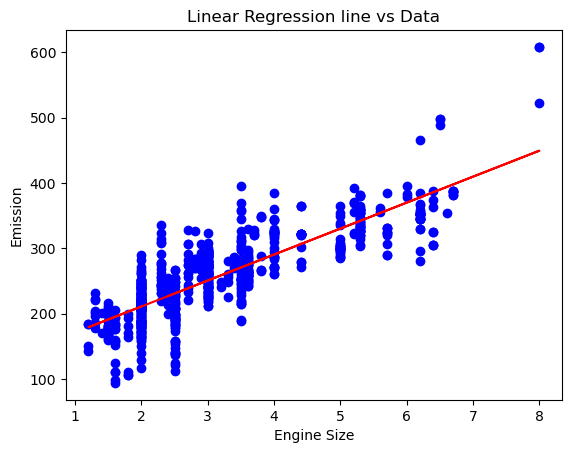

In [40]:
plt.scatter(gtrain.EngineSize, gtrain.CO2Emissions, color='blue')
plt.plot(gtrain.EngineSize, linreg.intercept_[0] + linreg.coef_[0][0]*gtrain.EngineSize, '-r') 
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.title('Linear Regression line vs Data')
plt.show()

In [42]:
from sklearn.metrics import r2_score

gaadiy = linreg.predict(gtest[['EngineSize']])


print("Mean absolute error: %.2f" % np.mean(np.absolute(gaadiy - gtest[['CO2Emissions']])))
print("Residual sum of squares (MSE): %.2f" % np.mean((gaadiy - gtest[['CO2Emissions']]) ** 2))
print("R2-score: %.2f" % r2_score(gtest[['CO2Emissions']] , gaadiy) )


Mean absolute error: 29.18
Residual sum of squares (MSE): 1314.62
R2-score: 0.59


C:\Users\Sumit\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Sumit\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


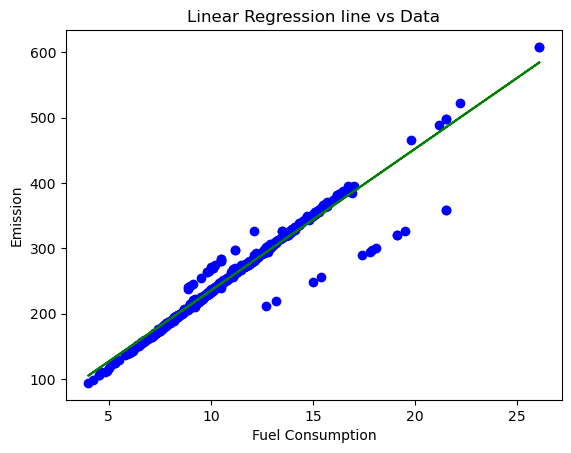

Mean absolute error: 5.15
Residual sum of squares (MSE): 117.71
R2-score: 0.96


C:\Users\Sumit\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Sumit\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [44]:
linreg.fit(gtrain[['FuelConsumption']], gtrain[['CO2Emissions']])
linreg.coef_, linreg.intercept_
gaadiyF = linreg.predict(gtest[['FuelConsumption']])

plt.scatter(gtrain.FuelConsumption, gtrain.CO2Emissions, color='blue')
plt.plot(gtrain.FuelConsumption, linreg.intercept_[0] + linreg.coef_[0][0]*gtrain.FuelConsumption, '-g') 
plt.xlabel('Fuel Consumption')
plt.ylabel('Emission')
plt.title('Linear Regression line vs Data')
plt.show()

print("Mean absolute error: %.2f" % np.mean(np.absolute(gaadiyF - gtest[['CO2Emissions']])))
print("Residual sum of squares (MSE): %.2f" % np.mean((gaadiyF - gtest[['CO2Emissions']]) ** 2))
print("R2-score: %.2f" % r2_score(gtest[['CO2Emissions']] , gaadiyF) )


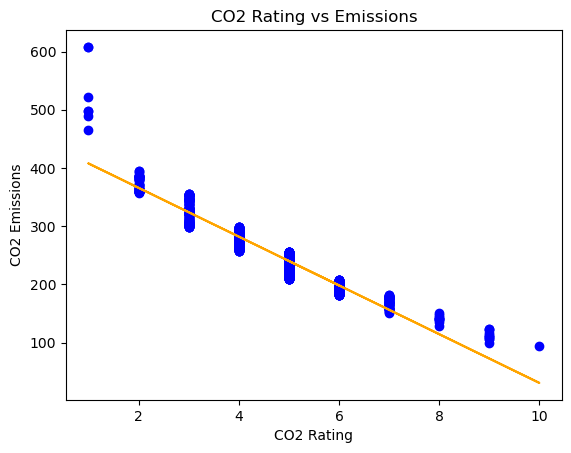

Mean Absolute Error: CO2Emissions    11.998787
dtype: float64
Mean Squared Error: CO2Emissions    216.43606
dtype: float64
R-squared: 0.9322178622213546


C:\Users\Sumit\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Sumit\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [46]:
linreg.fit(gtrain[['CO2Rating']],gtrain[['CO2Emissions']])
c,i = linreg.coef_, linreg.intercept_
preds = linreg.predict(gtest[['CO2Rating']])

plt.scatter(gtrain[['CO2Rating']],gtrain[['CO2Emissions']], color='blue')
plt.plot(gtrain[['CO2Rating']], i+c*gtrain[['CO2Rating']], color='orange')
plt.xlabel('CO2 Rating')
plt.ylabel('CO2 Emissions')
plt.title('CO2 Rating vs Emissions')
plt.show()

print("Mean Absolute Error:", np.mean(np.absolute(gtest[['CO2Emissions']] - preds)))
print("Mean Squared Error:", np.mean((gtest[['CO2Emissions']] - preds)**2))
print("R-squared:", r2_score(gtest[['CO2Emissions']],preds))

In [50]:
linreg.fit(gtrain.drop('CO2Emissions',axis=1),gtrain[['CO2Emissions']])


LinearRegression()

In [54]:


y_pred = linreg.predict(gtest.drop('CO2Emissions',axis=1))
linreg.coef_, linreg.intercept_

(array([[ -0.21193737,   4.01137148,  11.47696274, -16.61847935,
          -0.93860123]]),
 array([189.83304703]))

In [57]:
print("Mean Squared Error: ", np.mean( (y_pred-gtest[['CO2Emissions']]) ** 2) )
print("Variance Score: ", linreg.score(gtest.drop('CO2Emissions',axis=1),gtest[['CO2Emissions']]))

Mean Squared Error:  CO2Emissions    79.484787
dtype: float64
Variance Score:  0.9751074345795748


C:\Users\Sumit\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
